<a href="https://colab.research.google.com/github/heytanay/harry-potter-text-gen/blob/master/HPTG%20New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# # Upload the text
# files.upload()

!wget https://raw.githubusercontent.com/pprzetacznik/nlp-n-grams/master/train_corpus/Harry%20Potter%203%20Prisoner%20of%20Azkaban.txt

--2019-09-01 18:29:55--  https://raw.githubusercontent.com/pprzetacznik/nlp-n-grams/master/train_corpus/Harry%20Potter%203%20Prisoner%20of%20Azkaban.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611601 (597K) [text/plain]
Saving to: ‘Harry Potter 3 Prisoner of Azkaban.txt’

Harry Potter 3 Pris 100%[===================>] 597.27K  --.-KB/s    in 0.01s   

2019-09-01 18:29:55 (46.8 MB/s) - ‘Harry Potter 3 Prisoner of Azkaban.txt’ saved [611601/611601]



In [0]:
data = open('/content/Harry Potter 3 Prisoner of Azkaban.txt').read()

In [0]:
# Split the Data based on the two present new line characters after each line break. Most documents have a single new line character, but this one has 2.
# Also, drop first few elements like title and author name and chapter number as much as possible
corpus = data.lower().split('\n')
corpus = data.lower().split('\n')
del corpus[0:4]
# print(corpus)

In [0]:
corpus = corpus[0:100]
# print(corpus)

In [0]:
# Start doing NLP stuff
tokenizer = Tokenizer()

# Fit on our corpus
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequence using list of tokens
input_sequence = list()

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequence.append(n_gram_sequence)
    

# Pad sequences
max_seq_len = max([len(x) for x in input_sequence])
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_seq_len, padding='pre'))

# Create Predictors and label
predictors, label = input_sequence[:, :-1], input_sequence[:, -1]

label = ku.to_categorical(label, num_classes=total_words)

In [14]:
# Let's build the model

model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(550, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(500))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 100)           41200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 14, 1100)          2864400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 1100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 500)               3202000   
_________________________________________________________________
dense_2 (Dense)              (None, 206)               103206    
_________________________________________________________________
dense_3 (Dense)              (None, 412)               85284     
Total params: 6,296,090
Trainable params: 6,296,090
Non-trainable params: 0
____________________________________________

In [19]:
history = model.fit(predictors, label, epochs=100, verbose=2)

Epoch 1/100
805/805 - 2s - loss: 2.5010 - acc: 0.4273
Epoch 2/100
805/805 - 2s - loss: 2.4256 - acc: 0.4273
Epoch 3/100
805/805 - 2s - loss: 2.3692 - acc: 0.4311
Epoch 4/100
805/805 - 2s - loss: 2.3068 - acc: 0.4522
Epoch 5/100
805/805 - 2s - loss: 2.2773 - acc: 0.4720
Epoch 6/100
805/805 - 2s - loss: 2.2848 - acc: 0.4634
Epoch 7/100
805/805 - 2s - loss: 2.2010 - acc: 0.4932
Epoch 8/100
805/805 - 2s - loss: 2.1771 - acc: 0.4857
Epoch 9/100
805/805 - 2s - loss: 2.1410 - acc: 0.5081
Epoch 10/100
805/805 - 2s - loss: 2.1300 - acc: 0.5006
Epoch 11/100
805/805 - 2s - loss: 2.0667 - acc: 0.5242
Epoch 12/100
805/805 - 2s - loss: 2.0323 - acc: 0.5441
Epoch 13/100
805/805 - 2s - loss: 1.9798 - acc: 0.5578
Epoch 14/100
805/805 - 2s - loss: 1.9341 - acc: 0.5739
Epoch 15/100
805/805 - 2s - loss: 1.9010 - acc: 0.5876
Epoch 16/100
805/805 - 2s - loss: 1.9382 - acc: 0.5627
Epoch 17/100
805/805 - 2s - loss: 1.8617 - acc: 0.6037
Epoch 18/100
805/805 - 2s - loss: 1.8253 - acc: 0.6236
Epoch 19/100
805/80

In [0]:
model.save('nhtpg.h5')
# from google.colab import files
# files.download('nhtpg.h5')

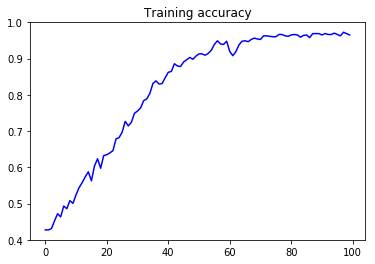

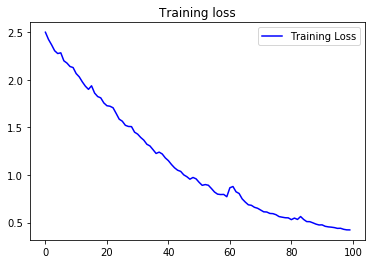

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [24]:
seed_text = "Harry potter is a"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Harry potter is a highly unusual boy in many ways for one thing


In [0]:
# Retrain the model
model = load_model('nhtpg.h5')

In [0]:
history = model.fit(predictors, label, epochs=1, verbose=1)

13798/13798 [==============================] - 56s 4ms/sample - loss: 0.5304 - acc: 0.9089


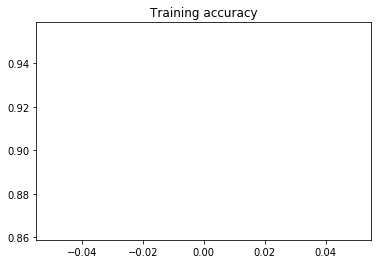

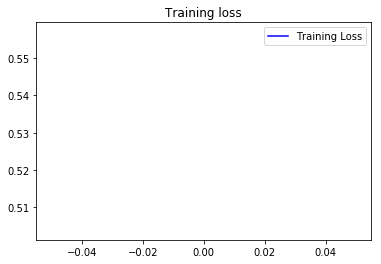

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
model.save('new_htpg.h5')
# files.download('nhtpg.h5')

In [0]:
seed_text = "Harry potter and the"
next_words = 1000
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Harry potter and the small red bottle into ron's hand and stop worrying crookshanks harry we said though a death omen he make nasty best rolled heavy people to his face it could be able to drag his trunk again and read other he other a crowd boy's turned swelling better other other starry country other conductor he isn't if you had a enclosed of other other hermione happen up the crowd got the door open a small wand hogwarts buses best in other a crowd gutter opened back on his forehead left me on other uncle vernon had better days days buses days boy's doors under the front page crowd archway return visit the way to the room under the dursleys still still made walking archway back fortune country like that she burped had been criticized by tom like a real doors make visit daily photograph better harry straightened up like a salami hair not just to think it had been a crowd to a crowd boy's fortune telling nasty days better better are archway to expand her tiny crowd would be internati